# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [ ]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [ ]:
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip']/ (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

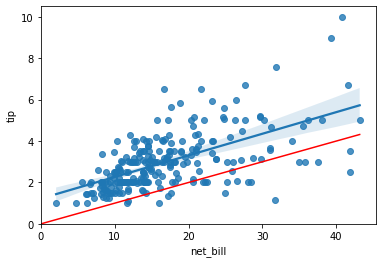

In [ ]:
#Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

#Gerando dados para a linha dos 10%
x = np.linspace(0, tips['net_bill'].max(),100)
y = .1*x

#Plotando os 10%
plt.plot(x, y, '-r', label='linha dos 10%')

#Opções gráficas
plt.xlim(left=0)
plt.ylim(bottom=0)

In [ ]:
reg_1 = smf.ols('tip ~ net_bill', data=tips).fit()
reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           5.02e-23
Time:                        16:59:17   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
reg_1.params

Intercept    1.330698
net_bill     0.099334
dtype: float64

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

(0.0, 0.505398619388979)

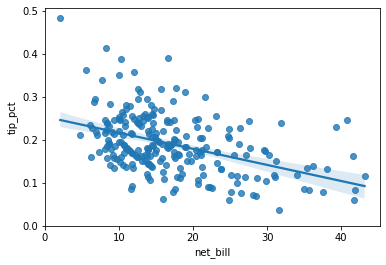

In [ ]:
#Gráfico de dispersão
sns.regplot(y = 'tip_pct', x = 'net_bill', data =tips[tips['tip_pct']<.5])

#Gerando dados para a linha dos 10%
x = np.linspace(0, tips['net_bill'].max(),100)
y = .1*x

#Opções gráficas
plt.xlim(left=0)
plt.ylim(bottom=0)

In [ ]:
reg_2 = smf.ols('tip_pct ~ net_bill', data=tips).fit()
reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           1.52e-06
Time:                        16:59:18   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
reg_2.params

Intercept    0.305297
net_bill    -0.006146
dtype: float64

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

No primeiro gráfico temos o 'tip' (gorjeta) em relação ao 'net_bill' (conta). O Valor da gorjeta 'tip' tem uma tendência de ser maior se a conta 'net_bill' também for maior. Seguindo bem a linha de marcação de 10% que colocamos para ajudar na visualização.
Quando o olhamos o segundo gráfico, temos o 'tip_pct' (relação em porcentagem da gojeta com o total da conta) versus o 'net_bill', também existe uma correlação, pois quando maior a conta 'net_bill', menor é o percentual da gorjeta, isso acontece, pois, se temos uma de 10 e uma gorjeta de 2, temos 20% de gorjeta, já num cenários de uma conta de 50 e uma gorjeta de 5, teriamos 10% de gorjeta. Ou seja, uma porcetagem menor, mas uma gorjeta - em valor, maior.  

o R², do primeiro exemplo, é de: 0.33 enquanto do segundo é: 0.09, isso mostra que o primeiro modelo tende a ser mais assertivo para as previsões.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [ ]:
novos_dados = tips

In [ ]:
pred = reg_2.predict(novos_dados)

In [ ]:
pred

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [ ]:
novos_dados['tip_predict'] = pred * novos_dados['net_bill']

In [ ]:
novos_dados.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,tip_predict
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,3.309254
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,2.186938
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,3.461450
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,3.668785
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,3.699998


(0.0, 4.854451750209254)

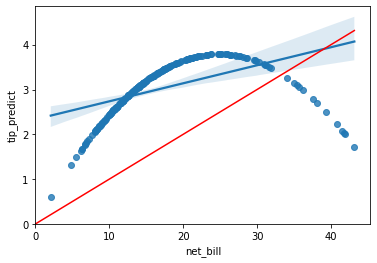

In [ ]:
#Gráfico de dispersão
sns.regplot(y = 'tip_predict', x = 'net_bill', data = novos_dados[novos_dados['tip_pct']<.5])

#Gerando dados para a linha dos 10%
x = np.linspace(0, tips['net_bill'].max(),100)
y = .1*x

#Plotando os 10%
plt.plot(x, y, '-r', label='linha dos 10%')

#Opções gráficas
plt.xlim(left=0)
plt.ylim(bottom=0)

In [ ]:
reg_3 = smf.ols('tip_predict ~ net_bill', data=novos_dados).fit()
reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            tip_predict   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     99.74
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           6.88e-20
Time:                        17:43:13   Log-Likelihood:                -192.63
No. Observations:                 244   AIC:                             389.3
Df Residuals:                     242   BIC:                             396.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2819      0.079     28.704      0.000       2.125       2.438
net_bill       0.0427      0.004      9.987      0.000       0.034       0.051
==============================================================================
Omnibus:                       97.034   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.025
Skew:                          -1.782   Prob(JB):                     5.74e-62
Kurtosis:                       6.878   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O modelo usando o tip_predito, se entendi direito o exercício, tem uma R² de 0.29, menor que o modelo encontrado no primeiro exercício. Porém, uma informação que fica bem clara no gráfico, é que temos um módelo preditivo bom até um conta 'net_bill' com o valor até 30.

In [ ]:
df_test = novos_dados.loc[(novos_dados['net_bill']<30)]

In [ ]:
df_test.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,tip_predict
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,3.309254
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,2.186938
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,3.461450
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,3.668785
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,3.699998


(0.0, 4.828835445338246)

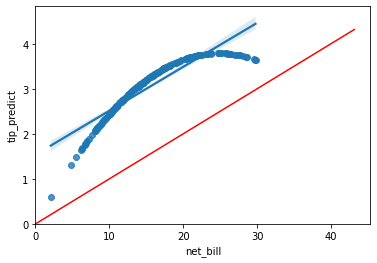

In [ ]:
#Gráfico de dispersão
sns.regplot(y = 'tip_predict', x = 'net_bill', data = df_test[df_test['tip_pct']<.5])

#Gerando dados para a linha dos 10%
x = np.linspace(0, tips['net_bill'].max(),100)
y = .1*x

#Plotando os 10%
plt.plot(x, y, '-r', label='linha dos 10%')

#Opções gráficas
plt.xlim(left=0)
plt.ylim(bottom=0)

In [ ]:
reg_4 = smf.ols('tip_predict ~ net_bill', data=df_test).fit()
reg_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            tip_predict   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1186.
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           3.02e-91
Time:                        18:03:46   Log-Likelihood:                -9.4359
No. Observations:                 225   AIC:                             22.87
Df Residuals:                     223   BIC:                             29.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4888      0.047     31.534      0.000       1.396       1.582
net_bill       0.1002      0.003     34.445      0.000       0.095       0.106
==============================================================================
Omnibus:                       83.350   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.221
Skew:                          -1.716   Prob(JB):                     1.66e-45
Kurtosis:                       6.197   Cond. No.                         45.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""